In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from env import host, user, password

def get_db_url(user, host, password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url

Text(0.5, 0, 'cars per hour')

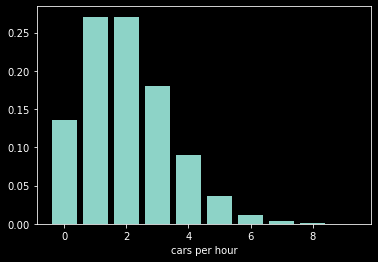

In [5]:
#1 A bank found that the average number of cars waiting during the noon hour at a drive-up window follows 
#a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these
#questions concerning the probability of cars waiting at the drive-up window.
x = np.arange(0,10)
y = stats.poisson(2).pmf(x)

plt.bar(x,y)
plt.xlabel('cars per hour')

In [6]:
# - What is the probability that no cars drive up in the noon hour?
cars = stats.poisson(2)
cars.pmf(0)

0.1353352832366127

In [8]:
# - What is the probability that 3 or more cars come through the drive through?
cars.sf(2)

0.32332358381693654

In [9]:
# - How likely is it that the drive through gets at least 1 car?
cars.sf(0)

0.8646647167633873

In [23]:
#2. Grades of State University graduates are normally distributed with a mean of 3.0 and a
#standard deviation of .3.
#Calculate the following:

# - What grade point average is required to be in the top 5% of the graduating class?
gpa = stats.norm(3,0.3)
gpa.isf(0.05)

3.4934560880854417

In [13]:
# - What GPA constitutes the bottom 15% of the class?
gpa.ppf(0.15)

2.689069983151863

In [24]:
# - An eccentric alumnus left scholarship money for students in the third decile from the bottom of 
# their class. Determine the range of the third decile. 
gpa.ppf(0.2), gpa.ppf(0.3)

(2.7475136299281258, 2.842679846187588)

In [ ]:
# Would a student with a 2.8 grade point average qualify for this scholarship?
#yes

In [16]:
# - If I have a GPA of 3.5, what percentile am I in?
gpa.sf(3.5)

0.0477903522728147

In [19]:
#3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and
# 97 click-throughs.
# How likely is it that this many people or more click through?
clicks = stats.binom(4326,0.02)
clicks.sf(96)

0.1397582363130086

In [52]:
#4. You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as 
# the answer to each question.
n_trials = 60
p = 0.01

homework = stats.binom(n_trials,p)

In [53]:
# -  What is the probability that at least one of your first 60 answers is correct?
homework.pmf(1)

0.33161008629744687

In [51]:
#5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when 
# they visit it, and, on any given day, 
# about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 
n = 59.4 
p = 0.03

clean = stats.binom(n,p)
clean.sf(0)

0.8342199288437355

In [55]:
# How likely is it that it goes two days without getting cleaned up? 
cleaned = np.random.choice([1,0],size=(100000,7),p=[0.03,0.97])
cleaned

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#All week?

In [ ]:
#6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when your
# lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

lunch = stats.norm(15,3)

In [59]:
#If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
#what is the likelihood that you have at least 15 minutes left to eat your food before you have to
#go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

#15mins = 50 - 2x(number of people) = 17.5
lunch.cdf(17.5)

0.7976716190363569

In [63]:
#7. Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation.
db = 'employees'

employees_url = get_db_url(user,host,password,db)

In [66]:
query = '''
select salary
from salaries
where to_date > curdate();
'''
salaries_df = pd.read_sql(query,employees_url)
salaries_df.to_csv('salaries.csv')
salaries_df = pd.read_csv('salaries.csv')


In [72]:
salaries_df = salaries_df.salary
salaries_df

0         88958
1         72527
2         43311
3         74057
4         94692
          ...  
240119    52868
240120    69501
240121    83441
240122    55003
240123    77303
Name: salary, Length: 240124, dtype: int64

In [75]:
salaries_df.mean(), salaries_df.std()

(72012.23585730705, 17309.99538025198)

In [76]:
# For the following questions, calculate the answer based on modeling the employees salaries with a
# normal distribution
salaries_dist = stats.norm(72012.24,17310)

In [78]:
# defined by the calculated mean and standard deviation then compare this answer to the actual 
# values present in the salaries dataset.

#a. What percent of employees earn less than 60,000?
salaries_dist.cdf(60000)

0.2438574078313278

In [84]:
(salaries_df < 60000).mean()

0.2705727041028802

In [79]:
#b. What percent of employees earn more than 95,000?
salaries_dist.sf(95000)

0.09208829007127312

In [85]:
(salaries_df > 95000).mean()

0.1086272092752078

In [80]:
#c. What percent of employees earn between 65,000 and 80,000?
salaries_dist.cdf(80000) - salaries_dist.cdf(65000)

0.33506048676360467

In [88]:
((salaries_df > 65000) & (salaries_df <85000)).mean()

0.39996418517099497

In [81]:
#d. What do the top 5% of employees make?
salaries_dist.isf(0.05)

100484.65628252999